# Facebook `prophet`

Import the needed packages

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet

## Prepare tempearture dataset

In [6]:
dt_temp_1 = pd.read_csv('/content/drive/MyDrive/Spiced Academy/data/df_last20y.csv', index_col=0, parse_dates= True)

In [7]:
dt_temp_1

,mean_temp_cor,year,month,day,timestep,trend
Timestamp,,,,,,
2001-01-01,0.4,2001,1,1,0,7.050889
2001-01-02,-2.0,2001,1,2,1,7.051118
2001-01-03,-1.5,2001,1,3,2,7.051347
2001-01-04,0.5,2001,1,4,3,7.051576
2001-01-05,0.9,2001,1,5,4,7.051806
...,...,...,...,...,...,...
2022-04-26,7.3,2022,4,26,7785,8.835794
2022-04-27,5.0,2022,4,27,7786,8.836023
2022-04-28,6.3,2022,4,28,7787,8.836253


In [8]:
dt_temp_1.drop(["year", "month", "day", "timestep", "trend"], axis=1, inplace = True)

In [9]:
df_temp=dt_temp_1.reset_index()

In [10]:
df_temp

,Timestamp,mean_temp_cor
0,2001-01-01,0.4
1,2001-01-02,-2.0
2,2001-01-03,-1.5
3,2001-01-04,0.5
4,2001-01-05,0.9
...,...,...
7785,2022-04-26,7.3
7786,2022-04-27,5.0
7787,2022-04-28,6.3
7788,2022-04-29,7.0


In [11]:
df_temp.columns=["ds", "y"]
df_temp

,ds,y
0,2001-01-01,0.4
1,2001-01-02,-2.0
2,2001-01-03,-1.5
3,2001-01-04,0.5
4,2001-01-05,0.9
...,...,...
7785,2022-04-26,7.3
7786,2022-04-27,5.0
7787,2022-04-28,6.3
7788,2022-04-29,7.0


## Define test and train data

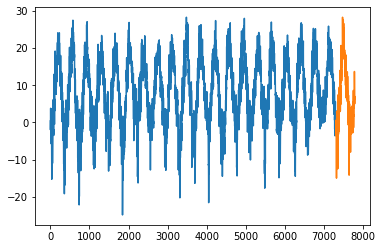

In [12]:
import datetime
date_before = pd.Timestamp(2020,12,31)
y_train = df_temp[df_temp['ds'] < date_before]
y_test = df_temp[df_temp['ds'] > date_before]

fig, ax = plt.subplots()
ax.plot(y_train['y'])
ax.plot(y_test['y'])

In [53]:
y_train

,ds,y
0,2001-01-01,0.4
1,2001-01-02,-2.0
2,2001-01-03,-1.5
3,2001-01-04,0.5
4,2001-01-05,0.9
...,...,...
7299,2020-12-26,0.0
7300,2020-12-27,-0.7
7301,2020-12-28,0.4
7302,2020-12-29,2.2


## Train the model 

In [13]:
m = Prophet(seasonality_mode='additive')
m.fit(y_train)

09:07:49 - cmdstanpy - INFO - Chain [1] start processing
09:07:50 - cmdstanpy - INFO - Chain [1] done processing


## Forcasting window 

In [14]:
future_temp = m.make_future_dataframe(periods=2*365, freq='D')
future_temp.head()

,ds
0,2001-01-01
1,2001-01-02
2,2001-01-03
3,2001-01-04
4,2001-01-05


In [15]:
future_temp.tail()

,ds
8029,2022-12-26
8030,2022-12-27
8031,2022-12-28
8032,2022-12-29
8033,2022-12-30


## Predict

In [16]:
forecast = m.predict(future_temp)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8029,2022-12-26,1.526862,-3.446088,6.037701
8030,2022-12-27,1.447848,-3.312205,6.306883
8031,2022-12-28,1.436953,-3.382565,6.086058
8032,2022-12-29,1.332435,-3.425948,6.222957
8033,2022-12-30,1.271327,-4.030432,6.359657


## Plot

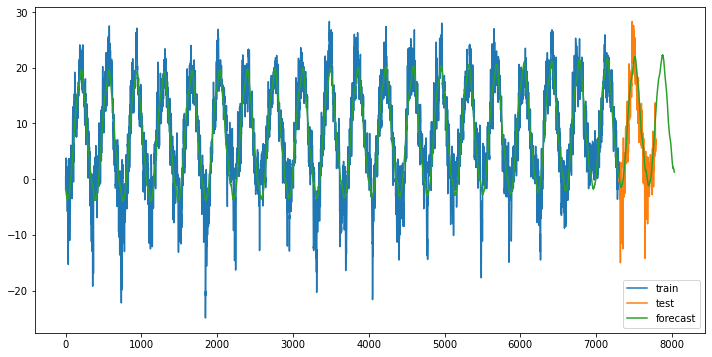

In [17]:
#Plot the larger timeframe 

fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.plot(y_train['y'], label='train')
ax.plot(y_test['y'], label='test')
ax.plot(forecast['yhat'], label='forecast')
ax.legend()

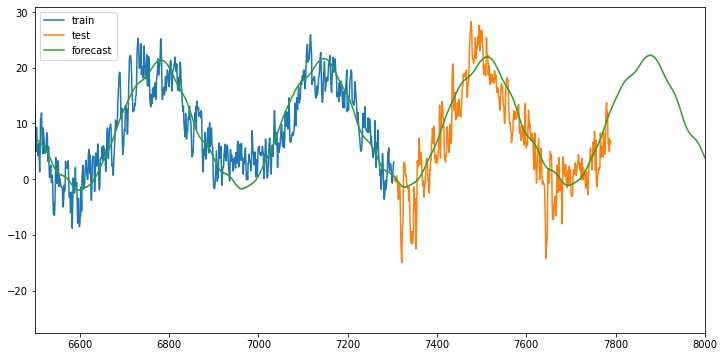

In [18]:
#Zoom into the past years

fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.plot(y_train['y'], label='train')
ax.plot(y_test['y'], label='test')
ax.plot(forecast['yhat'], label='forecast')
plt.xlim([6500, 8000])
ax.legend()

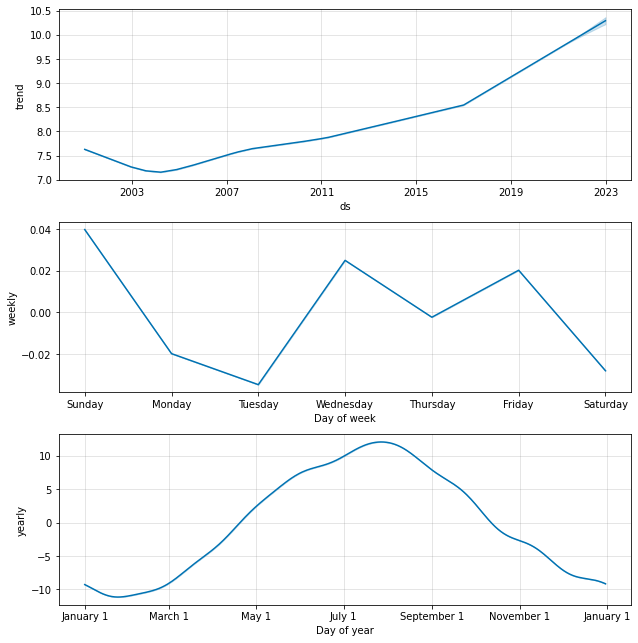

In [19]:
#Explore the components - trens/seasonality

plot = m.plot_components(forecast)

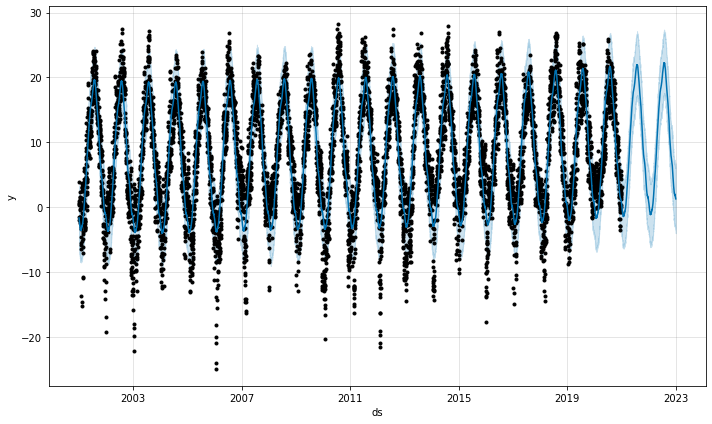

In [20]:
#Plot the forcast of the following years

fig2 = m.plot(forecast)

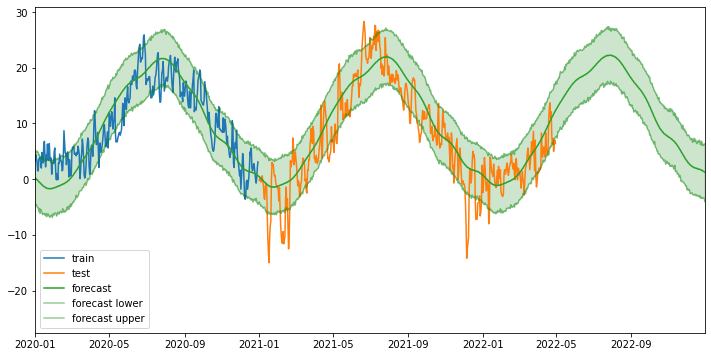

In [61]:
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.plot(y_train['ds'], y_train['y'], label='train')
ax.plot(y_test['ds'], y_test['y'], label='test')
ax.plot(forecast['ds'], forecast['yhat'], label='forecast')
ax.plot(forecast['ds'], forecast['yhat_lower'], label='forecast lower', color = "green", alpha=.4)
ax.plot(forecast['ds'], forecast['yhat_upper'], label='forecast upper', color = "green", alpha=.4)
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color = "green", alpha=.2)
ax.set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2022-12-30'))
ax.legend()

## Compare to the values in May from weather report and the AR model 

In [63]:
dates_test= ["2022-05-01", "2022-05-02", "2022-05-03", "2022-05-04", "2022-05-05", "2022-05-06", "2022-05-07"]
temp_test = [5.8, 8, 7.3, 6, 7.8, 12.5, 10.6]

df_test =pd.DataFrame(list(zip(dates_test, temp_test)), columns =['Date', 'mean_temp_cor'])
df_test
df_test['Timestamp']=pd.to_datetime(df_test['Date'])
df_test["year"] = df_test["Timestamp"].dt.year
df_test["month"] = df_test["Timestamp"].dt.month
df_test["day"] = df_test['Timestamp'].dt.day

df_test = df_test.set_index('Timestamp')

df_test.drop(["Date"], axis =1)

,mean_temp_cor,year,month,day
Timestamp,,,,
2022-05-01,5.8,2022,5,1
2022-05-02,8.0,2022,5,2
2022-05-03,7.3,2022,5,3
2022-05-04,6.0,2022,5,4
2022-05-05,7.8,2022,5,5
2022-05-06,12.5,2022,5,6
2022-05-07,10.6,2022,5,7


In [67]:
df_test

,Date,mean_temp_cor,year,month,day
Timestamp,,,,,
2022-05-01,2022-05-01,5.8,2022,5,1
2022-05-02,2022-05-02,8.0,2022,5,2
2022-05-03,2022-05-03,7.3,2022,5,3
2022-05-04,2022-05-04,6.0,2022,5,4
2022-05-05,2022-05-05,7.8,2022,5,5
2022-05-06,2022-05-06,12.5,2022,5,6
2022-05-07,2022-05-07,10.6,2022,5,7


In [80]:
dates_AR= ["2022-05-01", "2022-05-02", "2022-05-03", "2022-05-04", "2022-05-05", "2022-05-06", "2022-05-07"]
temp_AR = [12.581492, 7.204266, 9.033571, 8.452227, 7.372129, 8.868930, 12.776381]

df_AR =pd.DataFrame(list(zip(dates_AR, temp_AR)), columns =['Date', 'mean_temp_cor'])

df_AR['Timestamp']=pd.to_datetime(df_AR['Date'])
df_AR
#df_AR["year"] = df_AR["Timestamp"].dt.year
#df_AR["month"] = df_AR["Timestamp"].dt.month
#df_AR["day"] = df_AR['Timestamp'].dt.day

df_AR = df_AR.set_index('Timestamp')

df_AR.drop(["Date"], axis =1)
df_AR

,Date,mean_temp_cor
Timestamp,,
2022-05-01,2022-05-01,12.581492
2022-05-02,2022-05-02,7.204266
2022-05-03,2022-05-03,9.033571
2022-05-04,2022-05-04,8.452227
2022-05-05,2022-05-05,7.372129
2022-05-06,2022-05-06,8.868930
2022-05-07,2022-05-07,12.776381


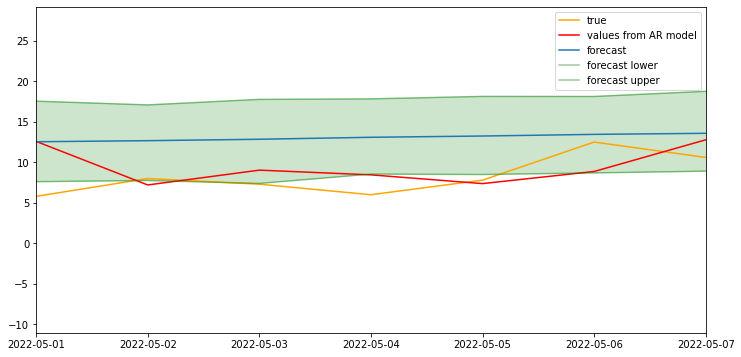

In [83]:
#Explore the prophit prediction, AR model prediction and true tempreature in the first seven days of May

fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.plot(df_test["mean_temp_cor"], color = "orange", label = "true")
ax.plot(df_AR["mean_temp_cor"], color = "red", label ="values from AR model")
ax.plot(forecast['ds'], forecast['yhat'], label='forecast')
ax.plot(forecast['ds'], forecast['yhat_lower'], label='forecast lower', color = "green", alpha=.4)
ax.plot(forecast['ds'], forecast['yhat_upper'], label='forecast upper', color = "green", alpha=.4)
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color = "green", alpha=.2)
ax.set_xlim(pd.Timestamp('2022-05-01'), pd.Timestamp('2022-05-07'))
ax.legend()